## Logistic Regression model for text classification
In this notebook, we will use logistic regression for text classification. We will be using the dataset of "Sentiment and Emotion in Text" from Kaggle.

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wilson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load the dataset and explore.
filepath = "data/Sentiment and Emotion in Text/train_data.csv"
df = pd.read_csv(filepath)
print(df.shape)
df.head()

(30000, 2)


,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [3]:
df['sentiment'].value_counts()

worry         7433
neutral       6340
sadness       4828
happiness     2986
love          2068
surprise      1613
hate          1187
fun           1088
relief        1021
empty          659
enthusiasm     522
boredom        157
anger           98
Name: sentiment, dtype: int64

In [4]:
# take 3 classes and leave out the rest.
df = df[df['sentiment'].isin(['worry', "neutral", "happiness"])]
df.shape

(16759, 2)

## Text pre-processing:
Tweets are different. Somethings to consider:

1. Removing @mentions, and urls
2. using NLTK Tweet tokenizer instead of a regular one
3. stopwords, numbers as usual.

In [5]:
# strip_handles removes personal information such as twitter handles, which don't contribute to emotion in the tweet. preserve_case=False converts everything to lowercase.
tweeter = TweetTokenizer(strip_handles=True,preserve_case=False)
mystopwords = set(stopwords.words("english"))

def clean_corpus(text):
    tokens = tweeter.tokenize(text)
    tokens = [token for token in tokens if token not in mystopwords and token not in string.punctuation and not token.isdigit()]
    return ' '.join(tokens)

In [6]:
# preprocess content
X = df['content'].apply(clean_corpus)
Y = df['sentiment']

# Split data into train and test, following the usual process
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=1234)

# Vectorize train and test data
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape) # can you tell me which is the feature size?

(12569, 15370)


In [7]:
# Use logistic classifier

logreg = LogisticRegression()
logreg.fit(X_train_dtm, Y_train)

# prediction
Y_preds = logreg.predict(X_test_dtm)

## Visualization of confusion matrix

In [8]:
print(f'The accuracy of the logistic regression model is {accuracy_score(Y_test, Y_preds)*100:.1f} %')

The accuracy of the logistic regression model is 56.2 %


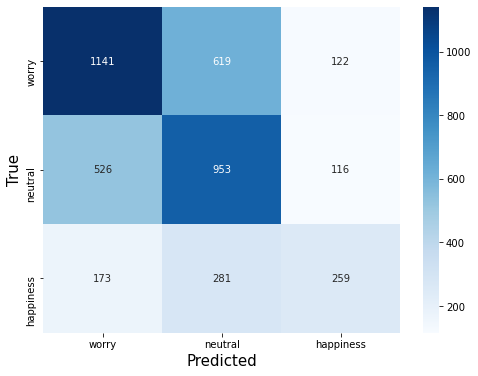

In [16]:
sentiment_label = ['worry', "neutral", "happiness"]
con_matrix = confusion_matrix(Y_test, Y_preds, labels=sentiment_label)
plt.figure(figsize=(8,6))
sns.heatmap(con_matrix, cmap='Blues', annot=True, fmt='',
            xticklabels=sentiment_label,
            yticklabels=sentiment_label)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)
plt.show()

#### Q&A: how can we improve the accuracy for the class happiness?